<a href="https://colab.research.google.com/github/may-/joeynmt/blob/speechjoey/speechjoey_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpeechJoey demo

**last update:** 2021/09/15  
**author:** May Ohta <ohta@cl.uni-heidelberg.de>

Install the right PyTorch version. Please make sure you enabled GPU runtime.

In [1]:
!nvidia-smi

Wed Sep 15 13:47:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install torch==1.9.0+cu111 torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
!pip install pandas inflect vizseq

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 2.1 MB/s eta 0:09:35tcmalloc: large alloc 1147494400 bytes == 0x5614f5406000 @  0x7ff426663615 0x5614baf4a02c 0x5614bb02a17a 0x5614baf4ce4d 0x5614bb03ec0d 0x5614bafc10d8 0x5614bafbbc35 0x5614baf4e73a 0x5614bafc0f40 0x5614bafbbc35 0x5614baf4e73a 0x5614bafbd93b 0x5614bb03fa56 0x5614bafbcfb3 0x5614bb03fa56 0x5614bafbcfb3 0x5614bb03fa56 0x5614bafbcfb3 0x5614baf4eb99 0x5614baf91e79 0x5614baf4d7b2 0x5614bafc0e65 0x5614bafbbc35 0x5614baf4e73a 0x5614bafbd93b 0x5614bafbbc35 0x5614baf4e73a 0x5614bafbcb0e 0x5614baf4e65a 0x5614bafbcd67 0x5614bafbbc35
     |████████████████▌               | 1055.7 MB 1.5 MB/s eta 0:11:17tcmalloc: large alloc 1434370048 bytes == 0x561539a5c000 @  0x7ff426663615 0x5614baf4a02c 0x5614bb02a17a 0x5614baf4ce4d 0x5614bb03ec0d 0x5614bafc10d8 0x5614bafbbc35 0x5614baf4e73a 0x5614bafc0f40 0x5614bafbbc35 0x5614baf4e73a 0x5614bafbd93b 0x5614bb03fa56 0x5614bafbcf

Mount your google drive. We save the data there, so that we can resume the process without restarting from NULL, even after the runtime is disconnected.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Fetch SpeechJoey and install it. You might have to restart the runtime after installing SpeechJoey.

In [4]:
!cd /content/drive/MyDrive/ && git clone https://github.com/may-/joeynmt.git
!cd /content/drive/MyDrive/joeynmt && git checkout speechjoey && pip install -e .

M	scripts/generate_copy_task.py
M	scripts/generate_reverse_task.py
M	scripts/get_iwslt14_bpe.sh
M	scripts/get_iwslt14_sp.sh
M	scripts/get_iwslt15_envi.sh
M	scripts/get_jparaclawl.sh
M	scripts/plot_validations.py
M	setup.py
Already on 'speechjoey'
Your branch is up to date with 'origin/speechjoey'.
Obtaining file:///content/drive/MyDrive/joeynmt
     |████████████████████████████████| 15.7 MB 194 kB/s 
     |████████████████████████████████| 1.2 MB 24.9 MB/s 
     |████████████████████████████████| 392 kB 41.9 MB/s 
     |████████████████████████████████| 106 kB 17.8 MB/s 
     |████████████████████████████████| 240 kB 47.1 MB/s 
     |████████████████████████████████| 55 kB 3.9 MB/s 
     |████████████████████████████████| 743 kB 45.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Running setup.py develop for joeynmt
ERROR: pip's dependency resolver does not currently take in

Check if the joeynmt path at '/content/drive/MyDrive/joeynmt/joeynmt' can be found. If you encounter an error, please try to restart the runtime.

In [4]:
import joeynmt
joeynmt.__path__

['/content/drive/MyDrive/joeynmt/joeynmt']

First, download the data and unpack it.

In [27]:
!wget https://www.cl.uni-heidelberg.de/statnlpgroup/joeynmt/speechjoey_demo.tar.gz

--2021-09-15 14:18:35--  https://www.cl.uni-heidelberg.de/statnlpgroup/joeynmt/speechjoey_demo.tar.gz
Resolving www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)... 147.142.207.78
Connecting to www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)|147.142.207.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1607951637 (1.5G) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/speechjoey_demo.tar.gz’

/content/drive/MyDr 100%[===================>]   1.50G  25.1MB/s    in 62s     

2021-09-15 14:19:39 (24.5 MB/s) - ‘/content/drive/MyDrive/speechjoey_demo.tar.gz’ saved [1607951637/1607951637]



In [28]:
!tar -xvf speechjoey_demo.tar.gz

speechjoey_demo/
speechjoey_demo/config_mt.yaml
speechjoey_demo/tatoeba20191004.s2t.de_en.tsv
speechjoey_demo/spm_bpe7000.txt
speechjoey_demo/spm_bpe7000.model
speechjoey_demo/mustc_en_asr.ckpt
speechjoey_demo/mustc_ende_mt.ckpt
speechjoey_demo/config_asr.yaml


Prepare a data dir and move the tsv file. This tsv file is taken from https://dl.fbaipublicfiles.com/covost/tatoeba.zip

In [ ]:
!mkdir /content/drive/MyDrive/data/
!mkdir /content/drive/MyDrive/data/tatoeba

In [29]:
!mv /content/speechjoey_demo/tatoeba20191004.s2t.de_en.tsv /content/drive/MyDrive/data/tatoeba

## Data pre-processing

We will reuse some functions defined in '/content/drive/MyDrive/joeynmt/scripts/*.py'

In [5]:
import sys
sys.path.append('/content/drive/MyDrive/joeynmt/scripts')

Define a dataset class for tatoeba corpus with English audio.

In [6]:
from scripts.audiodata_utils import load_tsv
from scripts.prepare_covost import Tatoeba
from pathlib import Path

class TatoebaEN(Tatoeba):
    SPLITS = ["train", "dev", "test"]
    def __init__(self, root: Path, src_lang: str, trg_lang: str, split: str):
        self.has_translation = trg_lang is not None # False -> asr; True -> ast
        self.root = Path(root) / "tatoeba"

        # we intentionally swap de <-> en
        cv_tsv_path = self.root / f"tatoeba20191004.s2t.{trg_lang}_{src_lang}.tsv"
        df = load_tsv(cv_tsv_path).rename(columns={
            'id': 'de_id',
            'en_id': 'id',
            'sentence': 'translation',
            'en_sentence': 'sentence',
            'speaker': 'client_id'
        })
        df["path"] = df["id"].apply(lambda x: f"{x}.mp3")
        

        if split == "train":
            self.df = df.head(1070)
        else:
            df = df.tail(22)
            if split == "dev":
                self.df = df.head(10)
            elif split == "test":
                self.df = df.tail(12)
                
        # download mp3
        mp3_path = self.root / "clips"
        mp3_path.mkdir(exist_ok=True)
        self._download_mp3(lang=src_lang, mp3_path=mp3_path, overwrite=False)
        
        # check validity
        self._drop_invalid(mp3_path=mp3_path)

        # whether to call torchaudio.load()
        self.return_wav = True


Download the mp3 files and save them in `/content/drive/MyDrive/data/tatoeba/clips`.

In [7]:
data_root = Path('/content/drive/MyDrive/data')
datasets = {}
for split in TatoebaEN.SPLITS:
    datasets[split] = TatoebaEN(data_root, src_lang='en', trg_lang='de', split=split)

100%|██████████| 1070/1070 [00:33<00:00, 31.72it/s]
INFO - 09/15/21 14:57:09 - 0:01:32 - NumExpr defaulting to 2 threads.


Skip 9-th instance in /content/drive/MyDrive/data/tatoeba/clips/1564.mp3.
Skip 13-th instance in /content/drive/MyDrive/data/tatoeba/clips/4694896.mp3.
Skip 28-th instance in /content/drive/MyDrive/data/tatoeba/clips/241488.mp3.
Skip 36-th instance in /content/drive/MyDrive/data/tatoeba/clips/256159.mp3.
Skip 42-th instance in /content/drive/MyDrive/data/tatoeba/clips/70730.mp3.
Skip 69-th instance in /content/drive/MyDrive/data/tatoeba/clips/24338.mp3.
Skip 77-th instance in /content/drive/MyDrive/data/tatoeba/clips/37842.mp3.
Skip 97-th instance in /content/drive/MyDrive/data/tatoeba/clips/44206.mp3.
Skip 110-th instance in /content/drive/MyDrive/data/tatoeba/clips/51618.mp3.
Skip 129-th instance in /content/drive/MyDrive/data/tatoeba/clips/260470.mp3.
Skip 130-th instance in /content/drive/MyDrive/data/tatoeba/clips/248706.mp3.
Skip 136-th instance in /content/drive/MyDrive/data/tatoeba/clips/27588.mp3.
Skip 147-th instance in /content/drive/MyDrive/data/tatoeba/clips/239682.mp3.
Sk

100%|██████████| 12/12 [00:01<00:00, 10.06it/s]


Skip 9110-th instance in /content/drive/MyDrive/data/tatoeba/clips/379179.mp3.
Skip 9116-th instance in /content/drive/MyDrive/data/tatoeba/clips/8095351.mp3.


In [6]:
for split in TatoebaEN.SPLITS:
    print(split, len(datasets[split]))

train 1004
dev 10
test 10


Let's inspect one example.

In [7]:
wav, sample_rate, n_frames, src_utt, trg_utt, spk_id, utt_id = datasets['dev'][0]
src_utt, trg_utt

('I had my doubts from the get-go.', 'Ich hatte von Anfang an Zweifel.')

In [8]:
from IPython.display import display, Audio
display(Audio(wav[0], rate=sample_rate))

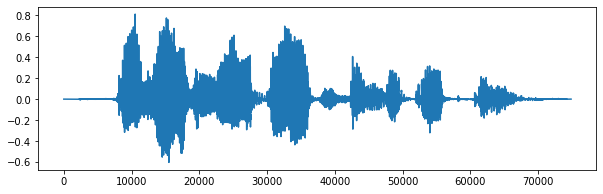

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.plot(wav[0,:].t().numpy())
plt.show()

Now we extract mel filterbank features with the frequency of 80. We will save the extracted features in /content/drive/MyDrive/data/tatoeba/fbank80 in numpy array format.

In [10]:
feature_root = data_root / 'tatoeba' / Tatoeba.FEATURE_ROOT
feature_root.mkdir(exist_ok=True)

In [11]:
from tqdm.notebook import tqdm
from scripts.prepare_covost import N_MEL_FILTERS
from joeynmt.helpers_for_audio import extract_fbank_features

for split, dataset in datasets.items():
    print(f"Extracting log mel filter bank features on {split} set...")
    for i, (wav, sample_rate, n_frames, _, _, _, utt_id) in enumerate(tqdm(dataset)):
        try:
            extract_fbank_features(wav, sample_rate, n_frames+2, utt_id,
                                   feature_root=feature_root,
                                   n_mel_bins=N_MEL_FILTERS,
                                   overwrite=False)
        except Exception as e:
            print(i, e, n_frames+2)

Extracting log mel filter bank features on train set...


  0%|          | 0/1004 [00:00<?, ?it/s]

945 torchaudio faild to extract mel filterbank features at utt_id: 438940. (110, (108, 80)) 110
955 torchaudio faild to extract mel filterbank features at utt_id: 59390. (204, (202, 80)) 204
962 torchaudio faild to extract mel filterbank features at utt_id: 290678. (277, (275, 80)) 277
963 torchaudio faild to extract mel filterbank features at utt_id: 456719. (159, (157, 80)) 159
970 torchaudio faild to extract mel filterbank features at utt_id: 463306. (120, (118, 80)) 120
1002 torchaudio faild to extract mel filterbank features at utt_id: 428402. (120, (118, 80)) 120
Extracting log mel filter bank features on dev set...


  0%|          | 0/10 [00:00<?, ?it/s]

Extracting log mel filter bank features on test set...


  0%|          | 0/10 [00:00<?, ?it/s]


The spectrogram of the example above looks like this:

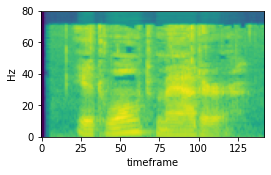

In [12]:
import numpy as np

def plot_spectrogram(x, figsize=(4,12)):
    plt.figure(figsize=figsize)
    plt.imshow(x.T)
    plt.ylim((0, 80))
    plt.ylabel('Hz')
    plt.xlabel('timeframe')
    plt.show()

npy = np.load((feature_root / f'{utt_id}.npy'))
plot_spectrogram(npy)

Pack features into ZIP

In [21]:
from scripts.prepare_covost import create_zip, get_zip_manifest, save_tsv

print("ZIPing features...")
create_zip(feature_root, feature_root.with_suffix(".zip"))

print("Fetching ZIP manifest...")
zip_manifest = get_zip_manifest(feature_root.with_suffix(".zip"))

ZIPing features...


100%|██████████| 985/985 [03:02<00:00,  5.39it/s]


Fetching ZIP manifest...


100%|██████████| 985/985 [00:01<00:00, 722.77it/s]


Generate TSV manifest

In [22]:
import pandas as pd

print("Generating manifest...")
all_data = []
with tqdm(total=len(zip_manifest)) as pbar:
    for split, dataset in datasets.items():
        dataset.return_wav = False  # a bit faster...
        for _, _, n_frames, src_utt, trg_utt, spk_id, utt_id in dataset:
            try:
                record = {
                    "id": utt_id,
                    "src": zip_manifest[str(utt_id)],
                    "n_frames": n_frames+2, # just an workaround in tatoeba
                    "en_utt": src_utt,
                    "de_utt": trg_utt,
                    #"speaker": spk_id, # note that it's a speaker of the German utterance. misuse for English!
                    "split": split
                }
                all_data.append(record)
            except Exception as e:
                print(e)
            pbar.update(1)
all_df = pd.DataFrame.from_records(all_data)
all_df 

Generating manifest...


  0%|          | 0/985 [00:00<?, ?it/s]

'438940'
'59390'
'290678'
'456719'
'463306'
'428402'


,id,src,n_frames,en_utt,de_utt,split
0,1284,fbank80.zip:38:57088,179,I will be back soon.,Ich werde bald zurück sein.,train
1,1287,fbank80.zip:57164:61568,193,This is never going to end.,Das wird nie enden.,train
2,1317,fbank80.zip:118770:62848,197,I never liked biology.,Ich mochte Biologie noch nie.,train
3,452696,fbank80.zip:181658:38528,121,I don't want it.,Ich möchte es nicht.,train
4,1403,fbank80.zip:220224:58368,182,Thanks for your explanation.,Danke für Ihre Erklärung.,train
...,...,...,...,...,...,...
1013,2248473,fbank80.zip:53242128:41088,128,Is it time?,Ist es so weit?,test
1014,2360506,fbank80.zip:53283257:70848,222,I have to go back to work.,Ich muss zurück an die Arbeit.,test
1015,24934,fbank80.zip:53354144:61568,193,Please do something about it.,Bitte tu was dagegen!,test
1016,2111683,fbank80.zip:53415753:44288,139,I'm staying.,Ich bleib’.,test


Note that you don't have to tokenize the target texts.

In the pretraining on mustc dataset, English transcriptions were normalized. Hence, we also normalize the English transcriptions in tatoeba corpus.

In [14]:
from scripts.audiodata_utils import Normalizer

mapping_path = "/content/drive/MyDrive/joeynmt/scripts/mapping_en.txt"
normalizer = Normalizer(lang='en',
                        lowercase=True,
                        remove_punc=True,
                        normalize_num=True,
                        mapping_path=mapping_path,
                        escape=True)

In [15]:
# i.e. arabic numbers will be in scriptive form
normalizer("I have 100 dollars.")

'i have one hundred dollars'

The column of trg labels should have the header name "trg". In this demo, we aim to translate the audio into German text, so we name the trg_utt column as "trg". 
For ASR task, you can rename the src_utt column as "trg".

In [23]:
from scripts.audiodata_utils import save_tsv
from joeynmt.helpers import write_list_to_file

columns = ['id', 'src', 'n_frames', 'trg']
for (task, trg_lang) in [('asr', 'en'), ('st', 'de')]:
    for split in TatoebaEN.SPLITS:
        split_df = (all_df[all_df.split == split]).rename(columns={f'{trg_lang}_utt': 'trg'})
        if trg_lang == "en":
            split_df['trg'] = split_df['trg'].apply(lambda x: normalizer(x))
        save_tsv(split_df[columns], data_root/f"tatoeba/{split}_{task}.tsv")
        write_list_to_file(data_root/f"tatoeba/{split}.{trg_lang}", split_df['trg'].to_list())

In [24]:
!cat /content/drive/MyDrive/data/tatoeba/dev_asr.tsv

id	src	n_frames	trg
7587119	fbank80.zip:52301678:74368	233	i had my doubts from the get go
2458559	fbank80.zip:52376087:49088	153	i think you'll find it
5583091	fbank80.zip:52425216:61568	193	are you coming this evening
1450797	fbank80.zip:52486825:87168	272	there were no radios in those days
2644666	fbank80.zip:52574034:54848	171	who did you have in mind
2245342	fbank80.zip:52628923:59328	186	don't get sentimental
2891199	fbank80.zip:52688292:45568	143	get it out of here
501258	fbank80.zip:52733900:59328	186	she sat on the bench
528259	fbank80.zip:52793268:73088	229	she came home very late
287946	fbank80.zip:52866396:50048	157	he seems happy


## Pretrained Model
The model we use in this notebook is pretrained on MuST-C v1 dataset.

In [46]:
!mkdir speechjoey_finetune

The model dir contains
- `mustc_en_asr.ckpt`: checkpoint for english asr
- `mustc_ende_mt.ckpt`: checkpoint for english-german mt
- `config_asr.yaml`: asr config file
- `config_mt.yaml`: mt config file
- `spm_bpe7000.txt`: en-de joint vocabulary
- `spm_bpe7000.model`: sentencepiece model

SpeechJoey reads model and training hyperparameters from a configuration file.



In [10]:
root = Path('/content')
config = """
name: "tatoeba-en-asr"
joeynmt_version: 1.4

data:
    task: "s2t"
    root_path: "{data_root}/tatoeba"
    train: "train_asr"
    dev: "dev_asr"
    test: "test_asr"
    src:
        num_freq: 80
        max_length: 3000
    trg:
        level: "bpe"
        lowercase: True
        tokenizer: "sentencepiece"
        max_length: 80
        voc_min_freq: 1
        voc_limit: 7000
        voc_file: "{model_root}/speechjoey_demo/spm_bpe7000.txt"
        spm:
            model_file: "{model_root}/speechjoey_demo/spm_bpe7000.model"
            enable_sampling: False # whether to enable BPE dropout
    specaugment:
        freq_mask_n: 1
        freq_mask_f: 18
        time_mask_n: 1
        time_mask_t: 40
        time_mask_p: 1.0
    cmvn:
        norm_means: True
        norm_vars: True
        before: True

testing:
    beam_size: 10
    alpha: 1.0
    sacrebleu:
        remove_whitespace: True
        tokenize: "intl"

training:
    load_model: "{model_root}/speechjoey_demo/mustc_en_asr.ckpt"
    reset_best_ckpt: True
    reset_scheduler: True
    reset_optimizer: True
    reset_iter_state: True
    random_seed: 456
    optimizer: "adam"
    adam_betas: [0.9, 0.99]
    scheduling: "warmupinversesquareroot"
    learning_rate: 2.0e-3
    learning_rate_min: 1.0e-6
    learning_rate_warmup: 10000
    clip_grad_norm: 10.0
    weight_decay: 0.0
    label_smoothing: 0.1
    batch_multiplier: 1
    normalization: "batch"
    batch_size: 5
    batch_type: "sentence"
    eval_batch_size: 5
    eval_batch_type: "sentence"
    early_stopping_metric: "eval_metric"
    epochs: 3
    validation_freq: 100
    logging_freq: 10
    eval_metrics: "wer"
    model_dir: "{model_root}/speechjoey_finetune"
    overwrite: True
    shuffle: True
    use_cuda: True
    fp16: False
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts: 3
    loss: "crossentropy-ctc"
    ctc_weight: 0.3

model:
    initializer: "xavier"
    init_gain: 1.0
    embed_initializer: "xavier"
    embed_init_gain: 1.0
    bias_initializer: "zeros"
    tied_embeddings: False
    tied_softmax: False
    encoder:
        type: "transformer"
        num_layers: 12
        num_heads: 8
        embeddings:
            embedding_dim: 80
            #embedding_dim: 512
            #scale: True
            #dropout: 0.
            #freeze: False
        # typically ff_size = 8 x hidden_size
        hidden_size: 512
        ff_size: 2048
        dropout: 0.15
        freeze: False
        subsample: True
        conv_kernel_sizes: 5,5
        conv_channels: 512
        in_channels: 80
    decoder:
        type: "transformer"
        num_layers: 6
        num_heads: 8
        embeddings:
            embedding_dim: 512
            scale: True
            dropout: 0.
            freeze: False
        # ff_size = 8 x hidden_size
        hidden_size: 512
        ff_size: 2048
        dropout: 0.15
        freeze: False
""".format(data_root=data_root.as_posix(), model_root=root.as_posix())
with open(root/'speechjoey_demo/config_asr.yaml','w') as f:
    f.write(config)

Before we start the fine-tuning, let's check the performance of the model on the tatoeba English audio.

In [51]:
!python -m joeynmt test /content/speechjoey_demo/config_asr.yaml --output_path /content/speechjoey_demo/hyps

2021-09-15 14:45:39,580 - INFO - root - Hello! This is Joey-NMT (version 1.4).
2021-09-15 14:45:39,581 - INFO - joeynmt.data - SpecAugment(freq_mask_n=1, freq_mask_f=18, time_mask_n=1, time_mask_t=40, time_mask_p=1.0)
2021-09-15 14:45:39,581 - INFO - joeynmt.data - CMVN(norm_means=True, norm_vars=True, before=True)
2021-09-15 14:45:39,581 - INFO - joeynmt.data - Loading tokenizer...
2021-09-15 14:45:39,589 - INFO - joeynmt.tokenizers - Trg tokenizer: SentencePieceTokenizer(level='bpe', lowercase=True, remove_punctuation=False, tokenizer='SentencePieceProcessor')
2021-09-15 14:45:39,589 - INFO - joeynmt.data - Building vocabulary...
2021-09-15 14:45:40,018 - INFO - joeynmt.data - Loading dev data...
2021-09-15 14:45:40,030 - INFO - joeynmt.data - Loading test data...
2021-09-15 14:45:40,040 - INFO - joeynmt.data - Data loaded.
2021-09-15 14:45:40,040 - INFO - joeynmt.helpers - Train dataset: None
2021-09-15 14:45:40,040 - INFO - joeynmt.helpers - Valid dataset: TsvDataset(task=s2t, len(

Note: you might need downgrade sacrebleu to 1.5.1 to make vizseq work.  
`!pip install --upgrade sacrebleu==1.5.1`

In [12]:
import vizseq
src = [(data_root / f'/tatoeba/clips/{x}.mp3').as_posix() for x in datasets['dev'].df['id']]
ref = (data_root / 'tatoeba/dev.en').as_posix()
hyp = (root / 'speechjoey_demo/hyps.dev').as_posix()
vizseq.view_examples({'speech': src}, references=ref, hypothesis=hyp, metrics=None, page_sz=10)

Source speech,/tatoeba/clips/7587119.mp3
Reference 0,i had my doubts from the get go
0,i had more adults than the doctor
Source speech,/tatoeba/clips/2458559.mp3
Reference 0,i think you'll find it
0,i think you'll find it
Source speech,/tatoeba/clips/5583091.mp3
Reference 0,are you coming this evening
0,or you're coming deceivable
Source speech,/tatoeba/clips/1450797.mp3
Reference 0,there were no radios in those days


Then, start the ASR training on tatoeba dataset.

In [52]:
!python -m joeynmt train /content/speechjoey_demo/config_asr.yaml

2021-09-15 14:46:28,944 - INFO - root - Hello! This is Joey-NMT (version 1.4).
2021-09-15 14:46:28,944 - INFO - joeynmt.helpers - cfg.name                           : tatoeba-en-asr
2021-09-15 14:46:28,944 - INFO - joeynmt.helpers - cfg.joeynmt_version                : 1.4
2021-09-15 14:46:28,944 - INFO - joeynmt.helpers - cfg.data.task                      : s2t
2021-09-15 14:46:28,944 - INFO - joeynmt.helpers - cfg.data.root_path                 : /content/drive/MyDrive/data/tatoeba
2021-09-15 14:46:28,944 - INFO - joeynmt.helpers - cfg.data.train                     : train_asr
2021-09-15 14:46:28,945 - INFO - joeynmt.helpers - cfg.data.dev                       : dev_asr
2021-09-15 14:46:28,945 - INFO - joeynmt.helpers - cfg.data.test                      : test_asr
2021-09-15 14:46:28,945 - INFO - joeynmt.helpers - cfg.data.src.num_freq              : 80
2021-09-15 14:46:28,945 - INFO - joeynmt.helpers - cfg.data.src.max_length            : 3000
2021-09-15 14:46:28,945 - INFO - jo

WER is improved from 64.29 to 14.29 on dev set, to 49.02 to 13.73 on test set. (lower is better)  

Here, you can see how the fintuning influenced on tatoeba dev set:

In [13]:
src = [(data_root / f'tatoeba/clips/{x}.mp3').as_posix() for x in datasets['dev'].df['id']]
ref = (data_root / 'tatoeba/dev.en').as_posix()
hyp = [(root / 'speechjoey_demo/hyps.dev').as_posix(), (root / 'speechjoey_finetune/00014100.hyps.dev').as_posix()]
vizseq.view_examples({'speech': src}, references=ref, hypothesis=hyp, metrics=None, page_sz=10)

## Speech Translation

SpeechJoey also works for Speech Translation tasks.
- Change the input data `train_asr` -> `train_st` with German texts on the `trg` column.
- We won't lowercase the German texts this time.
- We use the same vocabulary here. It's trained jointly for both languages. (see `scripts/prepare_mustc.py` for vocab training details.) 
- You can initialize the encoder by ASR weights, initialize the decoder by MT weights. These initializations are usually critical to reach good results (especially encoder!)
- For ST task, we evaluate the performance by BLEU (instead of WER)
  You can specify multiple metrics (comma-separated), i.e. `eval_metrics: bleu,wer`

In [53]:
!mkdir speechjoey_st

In [54]:
# Create the config
config = """
name: "tatoeba-ende-st"
joeynmt_version: 1.4

data:
    task: "s2t"
    root_path: "{data_root}/tatoeba"
    train: "train_st"
    dev: "dev_st"
    test: "test_st"
    src:
        num_freq: 80
        max_length: 3000
    trg:
        level: "bpe"
        lowercase: False           # We won't lowercase the German texts this time.
        tokenizer: "sentencepiece"
        max_length: 80
        voc_min_freq: 1
        voc_limit: 7000
        voc_file: "{model_root}/speechjoey_demo/spm_bpe7000.txt"
        spm:
            model_file: "{model_root}/speechjoey_demo/spm_bpe7000.model"
            enable_sampling: False # whether to enable BPE dropout
    specaugment:
        freq_mask_n: 1
        freq_mask_f: 18
        time_mask_n: 1
        time_mask_t: 40
        time_mask_p: 1.0
    cmvn:
        norm_means: True
        norm_vars: True
        before: True

testing:
    beam_size: 10
    alpha: 1.0
    sacrebleu:
        remove_whitespace: True
        tokenize: "intl"

training:
    load_encoder: "{model_root}/speechjoey_demo/mustc_en_asr.ckpt"   # initialize encoder by ASR weights
    load_decoder: "{model_root}/speechjoey_demo/mustc_ende_mt.ckpt"  # initialize decoder by MT weights
    reset_best_ckpt: True
    reset_scheduler: True
    reset_optimizer: True
    reset_iter_state: True
    random_seed: 456
    optimizer: "adam"
    adam_betas: [0.9, 0.99]
    scheduling: "warmupinversesquareroot"
    learning_rate: 2.0e-3
    learning_rate_min: 1.0e-6
    learning_rate_warmup: 10000
    clip_grad_norm: 10.0
    weight_decay: 0.0
    label_smoothing: 0.1
    batch_multiplier: 1
    normalization: "batch"
    batch_size: 5
    batch_type: "sentence"
    eval_batch_size: 5
    eval_batch_type: "sentence"
    early_stopping_metric: "eval_metric"
    epochs: 3
    validation_freq: 100
    logging_freq: 10
    eval_metrics: "bleu"          # evaluation metrics
    model_dir: "{model_root}/speechjoey_st"
    overwrite: True
    shuffle: True
    use_cuda: True
    fp16: False
    max_output_length: 100
    print_valid_sents: [0, 1, 2]
    keep_best_ckpts: 3
    loss: "crossentropy-ctc"
    ctc_weight: 0.3

model:
    initializer: "xavier"
    init_gain: 1.0
    embed_initializer: "xavier"
    embed_init_gain: 1.0
    bias_initializer: "zeros"
    tied_embeddings: False
    tied_softmax: False
    encoder:
        type: "transformer"
        num_layers: 12
        num_heads: 8
        embeddings:
            embedding_dim: 80
            #embedding_dim: 512
            #scale: True
            #dropout: 0.
            #freeze: False
        # typically ff_size = 8 x hidden_size
        hidden_size: 512
        ff_size: 2048
        dropout: 0.15
        freeze: False
        subsample: True
        conv_kernel_sizes: 5,5
        conv_channels: 512
        in_channels: 80
    decoder:
        type: "transformer"
        num_layers: 6
        num_heads: 8
        embeddings:
            embedding_dim: 512
            scale: True
            dropout: 0.
            freeze: False
        # ff_size = 8 x hidden_size
        hidden_size: 512
        ff_size: 2048
        dropout: 0.15
        freeze: False
""".format(data_root=data_root.as_posix(), model_root=root.as_posix())
with open(root/'speechjoey_demo/config_st.yaml','w') as f:
    f.write(config)

In [55]:
!python -m joeynmt train /content/speechjoey_demo/config_st.yaml

2021-09-15 14:50:29,114 - INFO - root - Hello! This is Joey-NMT (version 1.4).
2021-09-15 14:50:29,114 - INFO - joeynmt.helpers - cfg.name                           : tatoeba-ende-st
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.joeynmt_version                : 1.4
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.task                      : s2t
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.root_path                 : /content/drive/MyDrive/data/tatoeba
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.train                     : train_st
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.dev                       : dev_st
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.test                      : test_st
2021-09-15 14:50:29,115 - INFO - joeynmt.helpers - cfg.data.src.num_freq              : 80
2021-09-15 14:50:29,116 - INFO - joeynmt.helpers - cfg.data.src.max_length            : 3000
2021-09-15 14:50:29,116 - INFO - joey

As you see avobe, it doesn't work with 1k training data, but you can reach over 22 Bleu points on MustC en-de tst-COMMON, if you train the model on 250k training data.

In [15]:
src = [(data_root / f'tatoeba/clips/{x}.mp3').as_posix() for x in datasets['dev'].df['id']]
ref_en = (data_root / 'tatoeba/dev.en').as_posix()
ref_de = (data_root / 'tatoeba/dev.de').as_posix()
hyp = (root / 'speechjoey_st/00000600.hyps.dev').as_posix()
vizseq.view_examples({'speech': src, 'transcription': ref_en}, references=ref_de, hypothesis=hyp, metrics=None, page_sz=10)

Have fun with SpeechJoey!